# Name: Rohit Chandra


# 1 Matrices and Numpy

## 1.1 Matrices Theory

### 1.1.1 Write properties of matrices

Let A, B and C be m x n matrices:

a) **Commutative property:** A + B  =  B + A    

b) **Associative property:** A + (B + C)  =  (A + B) + C    

c) There is a unique m x n matrix O with

        A + O  =  A    (**additive identity**)

In other words, O is the **additive identity** for matrix addition.


d) For any  m x n matrix A there is an m x n matrix -A with

       A + -(A) = (-A) + A  =  O   (**additive inverse**)
       
So the matrix – A is the **additive inverse** of A or the negative of matrix A.

### 1.1.2 Write a python function to get a matrix from user

In [2]:
import numpy as np


def matrixFromUser():
    row = int(input("Enter the number of rows in a matrix: "))

    col = int(input("Enter the number of columns in a matrix: "))

    matrix = [[int(input()) for i in range (col)] for j in range(row)]
    
    #print(np.array(matrix))
    return np.array(matrix)
    
#matrixFromUser()

### 1.1.3 Get two matrices from the user and give them names A and B

In [3]:
A = matrixFromUser()
B = matrixFromUser()

Enter the number of rows in a matrix: 2
Enter the number of columns in a matrix: 2
1
2
3
4
Enter the number of rows in a matrix: 2
Enter the number of columns in a matrix: 2
5
6
7
8


In [4]:
print("Matrix A: \n",A)

Matrix A: 
 [[1 2]
 [3 4]]


In [5]:
print("Matrix B: \n", B)

Matrix B: 
 [[5 6]
 [7 8]]


In [6]:
len(B)

2

## 1.2 Matrix manipulation without using Numpy

### 1.2.1 Perform A^n (n is a user entered values)

In [100]:
def matrix_power(a, power):
    rows, columns = len(a), len(a[0])
    result = np.zeros((rows, columns))
    b = a
    for step in range(1, power):
        result = np.zeros((rows, columns)) # reset result to all zeroes matrix here
        for i in range(0, rows):
            for j in range(0, columns):
                for m in range(0, rows):
                    result[i][j] += a[i][m] * b[m][j]
        
        a = result
        
    return result

n = int(input("enter power of the matrix:"))
print(matrix_power(A,n)) 

enter power of the matrix:2
[[ 7. 10.]
 [15. 22.]]


### 1.2.2 Perform A Transpose

In [101]:
#Method 1:
transMatA = zip(*A)
print("Transpose of Matrix A is: ") 
for row in transMatA:
    print([row])

Transpose of Matrix A is: 
[(1, 3)]
[(2, 4)]


In [103]:
#method2:

result = [[0,0],
          [0,0]]
          
# iterate through rows
for i in range(len(A)):
   # iterate through columns
   for j in range(len(A[0])):
        result[j][i] = A[i][j]
print("Transpose of Matrix A is: ")        
for i in result:
    print(i)

Transpose of Matrix A is: 
[1, 3]
[2, 4]


### 1.2.3 Calculate Determinant of A

In [104]:

def getMatrixMinor(m,i,j):
    return [row[:j] + row[j+1:] for row in (m[:i]+m[i+1:])]

def getMatrixDeterminant(m):
    #base case for 2x2 matrix
    if len(m) == 2:
        return m[0][0]*m[1][1]-m[0][1]*m[1][0]

    determinant = 0
    for c in range(len(m)):
        determinant += ((-1)**c)*m[0][c]*getMatrixDeterminant(getMatrixMinor(m,0,c))
    return determinant

detA = getMatrixDeterminant(A)
print("Determinant of matrix A: ", detA)

Determinant of matrix A:  -2


### 1.2.4 Calculate A Inverse (If not possible code should give relevant reason)

In [105]:
def transposeMatrix(m):
    return map(list,zip(*m))

def getMatrixInverse(m):
    determinant = getMatrixDeterminant(m)
    
    #If not possible code should give relevant reason
    if determinant == 0:
        print('Inverse cannot be calculated for determinant = 0')
        sys.exit()
    #special case for 2x2 matrix:
    if len(m) == 2:
        return [[m[1][1]/determinant, -1*m[0][1]/determinant],
                [-1*m[1][0]/determinant, m[0][0]/determinant]]

    #find matrix of cofactors
    cofactors = []
    for r in range(len(m)):
        cofactorRow = []
        for c in range(len(m)):
            minor = getMatrixMinor(m,r,c)
            cofactorRow.append(((-1)**(r+c)) * getMatrixDeterminant(minor))
        cofactors.append(cofactorRow)
    cofactors = transposeMatrix(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r][c] = cofactors[r][c]/determinant
    return cofactors

print(getMatrixInverse(A))

[[-2.0, 1.0], [1.5, -0.5]]


### 1.2.5 Calculate A*B (If not possible, code should give relevant reason)

In [106]:
def zeros_matrix(rows, cols):
    A = []
    for i in range(rows):
        A.append([])
        for j in range(cols):
            A[-1].append(0.0)

    return A



def matrix_multiply(A,B):
    rowsA = len(A)
    colsA = len(A[0])

    rowsB = len(B)
    colsB = len(B[0])
    #If not possible, code should give relevant reason
    if colsA != rowsB:
        print('Number of A columns must equal number of B rows.')
        sys.exit()

    C = zeros_matrix(rowsA, colsB)

    for i in range(rowsA):
        for j in range(colsB):
            total = 0
            for ii in range(colsA):
                total += A[i][ii] * B[ii][j]
            C[i][j] = total

    return C

print(matrix_multiply(A,B))

[[19, 22], [43, 50]]


### 1.2.6 Calculate A+B (If not possible, code should give relevant reason)

In [107]:
mat_sum_res = [[0,0],
         [0,0]]

def mat_sum(A, B):
    rowsA = len(A)
    colsA = len(A[0])
    rowsB = len(B)
    colsB = len(B[0])
    
    ##If not possible, code should give relevant reason
    if rowsA != rowsB and colsA != colsB:
        print('Number of A rows, columns must equal number of B rows, columns.')
        sys.exit()

    # iterate through rows
    for i in range(rowsA):
        # iterate through columns
        for j in range(colsB):
            mat_sum_res[i][j] = A[i][j] + B[i][j]
            
    return mat_sum_res
            
        
print(mat_sum(A, B))

[[6, 8], [10, 12]]


## 1.3 Matrix manipulation using Numpy


### 1.3.1 Perform all the operations in the previous question using Numpy

In [108]:
from numpy.linalg import inv

In [109]:
#A^n power using numpy

power = np.linalg.matrix_power(A, 2)
print(power)

[[ 7 10]
 [15 22]]


In [110]:
#A Transpose using numpy
atrans = np.transpose(A)
atrans

array([[1, 3],
       [2, 4]])

In [113]:
#determinant using numpy
np.linalg.det(A)

-2.0000000000000004

In [111]:
#inverse using numpy

ainv = inv(np.matrix(A))
ainv

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [112]:
#Inverse when matrix is not square matrix - throws LinAlgError  error
C = np.array([[1,2],
    [5,7,8]])
cinv = inv(np.matrix(C))
cinv

D:\IDEs\Anaconda\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


LinAlgError: Last 2 dimensions of the array must be square

In [46]:
#Method 1: A*B using np.matmul()

np.matmul(A, B)

array([[19, 22],
       [43, 50]])

In [75]:
# Method-2: multiplication A*B using numpy
matmul_result = np.dot(A,B)
matmul_result

array([[19, 22],
       [43, 50]])

In [47]:
#A+B: The operator + can be used to add multiple matrices:

A + B

array([[ 6,  8],
       [10, 12]])

### 1.3.2 Perform following operations in Numpy: Reduced Mean, Reduced Sum, Argmax, Zip and One Hot Encoding

In [39]:
#Reduced Mean for matrix A
np.mean(A)

2.5

In [40]:
#Reduced Mean for matrix B
np.mean(B)

6.5

In [41]:
#Reduced sum for matrix A
np.sum(A)

10

In [42]:
#Reduced Mean for matrix B
np.sum(B)

26

In [49]:
#argmax: Returns the indices of the maximum values along an axis.
# Max = 4 which is at 3rd index
np.argmax(A)

3

In [48]:
#Max = 8 which is at 3rd index position
np.argmax(B)

3

In [60]:
#zip

i = ("John", "Charles", "Mike")
j = ("Cena", "Babbage", "Tyson")

x = zip(i, j)
print(tuple(x))

(('John', 'Cena'), ('Charles', 'Babbage'), ('Mike', 'Tyson'))


In [72]:
#one hot encoding
#one_hot = np.array(['a','b','c'])

a = np.array([3, 0, 3, 1])
b = np.zeros((a.size, a.max()+1))
b[np.arange(a.size),a] = 1
b

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

# 2 Pandas

## 2.1 read a csv data to pandas dataframe (data 1)

In [17]:
#reading data1 in CSV

df1 = pd.read_csv("D:/Masters/SJSU/Academics/sem_2/CMPE_257_ML/Assignments/HW1/Data/data_1.csv",  header=None)
df1.head()

<IPython.core.display.Javascript object>

,0,1
0,-0.752400,-1.992827
1,-0.702025,-1.935445
2,0.058185,-1.020321
3,-0.097662,-1.857889
4,-0.369050,0.209050


## 2.2 Demonstrate any 5 functions from the following link on the loaded dataset

https://pandas.pydata.org/docs/reference/general_functions.html

In [18]:
#1 isna: check for null values in each column

df1.isna().sum()

0    0
1    0
dtype: int64

In [19]:
#2 unique: Return unique values based on a hash table.
pd.unique(df1[0])

<IPython.core.display.Javascript object>

array([-0.75240029, -0.70202519,  0.05818474, ...,  1.35851447,
        0.66805519,  0.19084289])

In [20]:
#3 pandas.cut: Bin values into discrete intervals.
pd.cut(df1[1], 5)


<IPython.core.display.Javascript object>

0       (-3.424, 1.811]
1       (-3.424, 1.811]
2       (-3.424, 1.811]
3       (-3.424, 1.811]
4       (-3.424, 1.811]
             ...       
9995    (-3.424, 1.811]
9996    (-3.424, 1.811]
9997     (1.811, 7.045]
9998     (1.811, 7.045]
9999     (1.811, 7.045]
Name: 1, Length: 10000, dtype: category
Categories (5, interval[float64, right]): [(-13.919, -8.658] < (-8.658, -3.424] < (-3.424, 1.811] < (1.811, 7.045] < (7.045, 12.279]]

In [115]:
#4 Take separate series and convert to numeric, coercing when told to
pd.to_numeric(df1[1], downcast='float')

0      -1.992827
1      -1.935445
2      -1.020321
3      -1.857889
4       0.209050
          ...   
9995   -1.723467
9996   -2.009323
9997    4.867444
9998    2.753525
9999    2.156421
Name: 1, Length: 10000, dtype: float32

In [114]:
#5 Quantile-based discretization function.
pd.qcut(df1[0], 3)

0       (-3.9499999999999997, -0.434]
1       (-3.9499999999999997, -0.434]
2                      (-0.434, 0.43]
3                      (-0.434, 0.43]
4                      (-0.434, 0.43]
                    ...              
9995                   (-0.434, 0.43]
9996    (-3.9499999999999997, -0.434]
9997                    (0.43, 3.583]
9998                    (0.43, 3.583]
9999                   (-0.434, 0.43]
Name: 0, Length: 10000, dtype: category
Categories (3, interval[float64, right]): [(-3.9499999999999997, -0.434] < (-0.434, 0.43] < (0.43, 3.583]]

# 3 Plotting

## 3.1 read a csv data to pandas dataframe (data 2)

In [29]:
#reading data2 in CSV
df2 = pd.read_csv("D:/Masters/SJSU/Academics/sem_2/CMPE_257_ML/Assignments/HW1/Data/data_2.csv",  header=None)
df2.head()

<IPython.core.display.Javascript object>

,0,1
0,-6.283185,0.043487
1,-6.281929,0.084347
2,-6.280672,-0.028693
3,-6.279415,0.021445
4,-6.278158,0.020871


## 3.2 plot the above dataset using matplotlib

<AxesSubplot:>

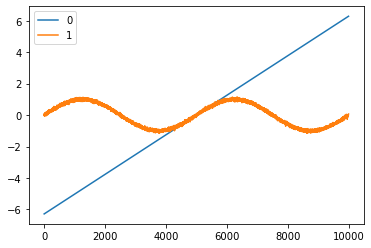

In [25]:
# importing matplotlib
import matplotlib.pyplot as plt

#df2.plot(kind='scatter',x=df2[0],y=df2[1],color='red')
#plt.show()

df2.plot()

**Observation:** Values in the 1st column forms a straight line(y=mx + b) and in 2nd column they form a wave like pattern 

## 3.3 load the tips dataset from seaborn

In [32]:
import seaborn as sb
tips_df = sb.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 3.4 plot pairplot, jointplot, catplot, displot, and HeatMap for the above dataset and give your comments on each plot

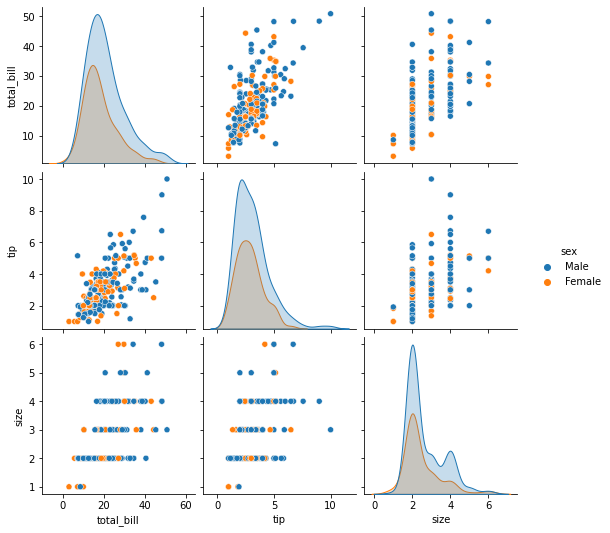

In [33]:
sb.pairplot(tips_df, hue ='sex')
# to show
plt.show()

**Observation:**

1) total bill and tip are the most positively correlated. This means that as tip increases, total bill increases and vice versa  if we set the cutoff at 0.6 then we can drop one of them based on the correlation value with the label column. 

2) total_bill and size is more for male compared to female

3) tip and size have least correlation since the distribution is flat 

<IPython.core.display.Javascript object>

D:\IDEs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


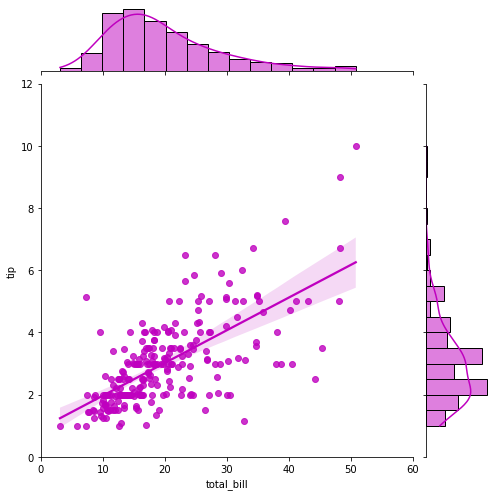

In [35]:
g = sns.jointplot("total_bill", "tip", data=tips_df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=7)

**Observation:**

1) The distribution is right skewed( the tail is on the right side).Hence the mean, median, and mode are all different.The mean lies around value 18. Data skewed to the right is usually a result of a lower boundary in a data set (whereas data skewed to the left is a result of a higher boundary). So if the data set's lower bounds are extremely low relative to the rest of the data, this will cause the data to skew right.

2) As the total bill increases the tip increases to some extent. We see 2 data points of total bill which increase significantly as tip increases and vice versa.

3) There is a positive correlations between total bill and tip

<IPython.core.display.Javascript object>

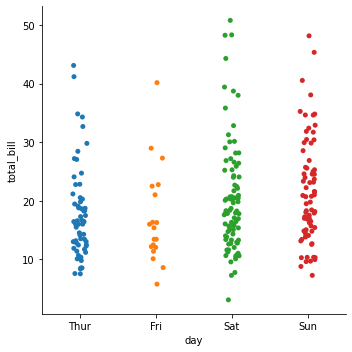

In [36]:

sns.catplot(x="day", y="total_bill", data=tips_df)

**Observations:**

1) The total bills on friday are the least

2) the highest total bill is on Saturday which is over 50 followed by Sunday

<IPython.core.display.Javascript object>

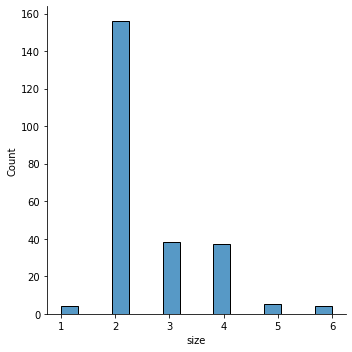

In [37]:
sns.displot(tips_df, x="size")

**Observation:**

1) the count is highest for size 2 and least for 1 and 6(approx)

2) siez = 3 has the 2nd highest count

<IPython.core.display.Javascript object>

<AxesSubplot:>

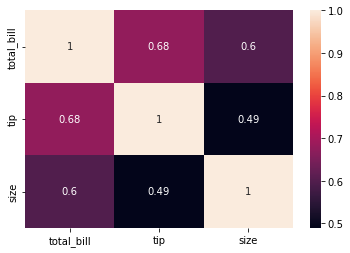

In [66]:
sns.heatmap(tips_df.corr(), annot=True)

**Observation:**

1) total bills and tips have highest correlation with the value 0.68

2) tips and size are least correlated with value 0.49

3) size and total bills have high correlation wit value 0.6